# Variational Quantum EigenSolver
this notebook we  Demonstrate  what is VQE, working of VQE Algorithm for H<sub>2</sub> molecule.
In this notebook we  wiil learn:
- Why **Variational Quantum Eigensolver(VQE)** is used in quantum chemistry.
- The main Goal of VQE Algorithm
- How molecular Hamiltonions are solved using quantum circuits
- Parametrized ansatz
- expectation value calculation
- How to compute the **ground state energy of the H<sub>2</sub>** molecule.

## Why Do we Use the VQE methods?
Quantum Chemistry require solving the Schrodinger equation , which scales exponentially with number of electron and orbitals.
for molecule larger then H<sub>2</sub> :
- Memory requirement explode.
- Computation becomes interactable.

VQE is Designed for Noisy-Intermidiate-Scale Qunatum(NISQ) devices.
- Uses **short,shallow quantum circuit** 
- Shifts heavy optimization to **classical computers**
- Is **noise-resilent**
- Provides **approximate but accurate energies**

**This makes VQE practical foe near-Term qunatum Hardware**

## Import Required  Libraries
we used Qiskit and Qiskit nature for quantum  chemistry  Simulations. 


In [12]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector,Pauli
from scipy.optimize import minimize
import numpy as np
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

## H<sub>2</sub> Molecular Hamiltonion(Qubit Form)
For bond distance approximately 0.735 A ,the H<sub>2</sub> Hamiltonion (after fermion-to-qubit mapping) is:
$$
H =c_0 I + c_1 Z_0 + c_2 Z_1 +c_3 Z_0 Z_1 + c_4 X_4 X_1 
$$
These coefficents are **precomputed** and commanly used in VQE benchmarks.

In [3]:
coeffs={
    'II':-1.052373245772859,
    'ZI': 0.39793742484318045,
    'IZ':-0.39793742484318045,
    'ZZ':-0.01128010425623538,
    'XX': 0.18093119978423156
}

## Define the variation Ansatz
A **hardware-efficient ansatz** with a single parameter is used. We construct a simple parametrized quantum circuit using RY rotation on qubit 0 and a CNOT gate to entangle the qubits.This ansatz creates a trial quantum state that can be tuned via the paramater $\theta$ 

In [4]:
def ansatz(theta):
    qc=QuantumCircuit(2)
    qc.ry(theta,0)
    qc.cx(0,1)
    return qc


## Expectations Value Calculation
Expectations values are computed using **statevector simulation**. for each term hamiltonion we calculate its expectation value using the statevector of the trial quantum state.This allow us to compute thetotal energy corrospnding to a given $\theta $.

In [6]:
def expectation_value(qc,pauli_string):
    state =Statevector.from_instruction(qc)
    pauli = Pauli(pauli_string)
    return np.real(state.expectation_value(pauli))

## VQE Cost function
The cost function evaluates the energy expectation value.tha cost function combines all hamiltonion terms weightd by their coefficents,Minimizing this function corrospond to finding the quantum state ith the lowest energy. 

In [9]:
def vqe_energy(theta):
    qc=ansatz(theta[0])
    energy =0.0
    for term ,coeff in coeffs.items():
        energy+=coeff*expectation_value(qc,term)
    return energy

## Classical Optimization
We minimize the energy using a classical optimizer. A classical optimizer (COBYLA) is usedto interactively update the parameter $\theta$ to minimize the cost function.The result is the optimal $\theta$ approximates the ground state of H<sub>2</sub>.

In [10]:
initial_state=[0.0]
result = minimize(vqe_energy,initial_state,method='COBYLA')

## Final Optimized VQE Circuit
The circuit below represents the **final variational quantum circuit**

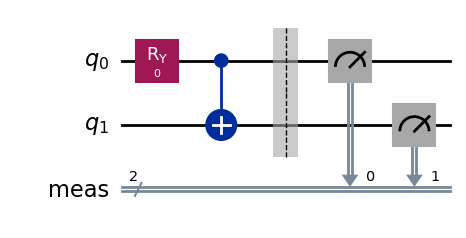

In [15]:
vqe_circuit=ansatz(0.0)
vqe_circuit.measure_all()
vqe_circuit.draw('mpl')

## Run circuit on Simulator


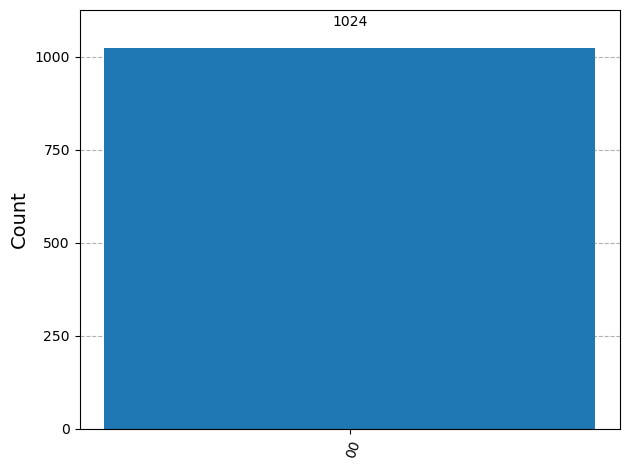

In [17]:
sim=AerSimulator()
result_sim=sim.run(vqe_circuit,shots=1024).result()
counts=result_sim.get_counts()
plot_histogram(counts)
#plt.title("final VQE Measurement Histogram")
#plt.show()


here we seen, Above histogram count of {'00': 1024} means that in 1024 repeated measurement , the quantum state always collapsed to |00> ,indicating that the optimized VQE state is very close to the ground basis state with near-unit probability.

## Result
Ground State energy obtained via VQE:

In [11]:
print("Optimal paramater :",result.x)
print("\n Ground State Energy(Hartree):",result.fun)

Optimal paramater : [-1.5708]

 Ground State Energy(Hartree): -1.244584549812105


The VQE optimization coverged to an optimal parameter value of $\theta\ $ approximately $-\frac\pi{2} $ ,which minimizes the expectation value of the molucular hamiltonion. The resulting ground state energy of **-1.244584549812105** hartree and optimal parameter of $\theta$ approximately **-1.5708** corrosponds to bound electronic ground state of the H<sub>2</sub> molecule .The measurement histogram shows a dominant |00> outcomes , indicating that the optimized variational state has coverged to a stable configuration . These results validate the correctness of the VQE implementation under a minimal ansatz and reduced hamiltonian.

--

**Author:** *Shreya Palase*  

**Date Created:**  *16-Dec-2025*

**project:** Quantum-Computing-coding

**File:** day22_VQEAlgorithm.ipynb

Thank you and Keep Learning!

<sub>© Shreya Palase- All Rights Reserved.This notbook is part of a structured learning series designed for Github publication.</sub>